In [1]:
%matplotlib inline
from helpers import extract_images, load_data
import matplotlib.pyplot as plt
import numpy as np
import cv2

> Extracting images from video
done


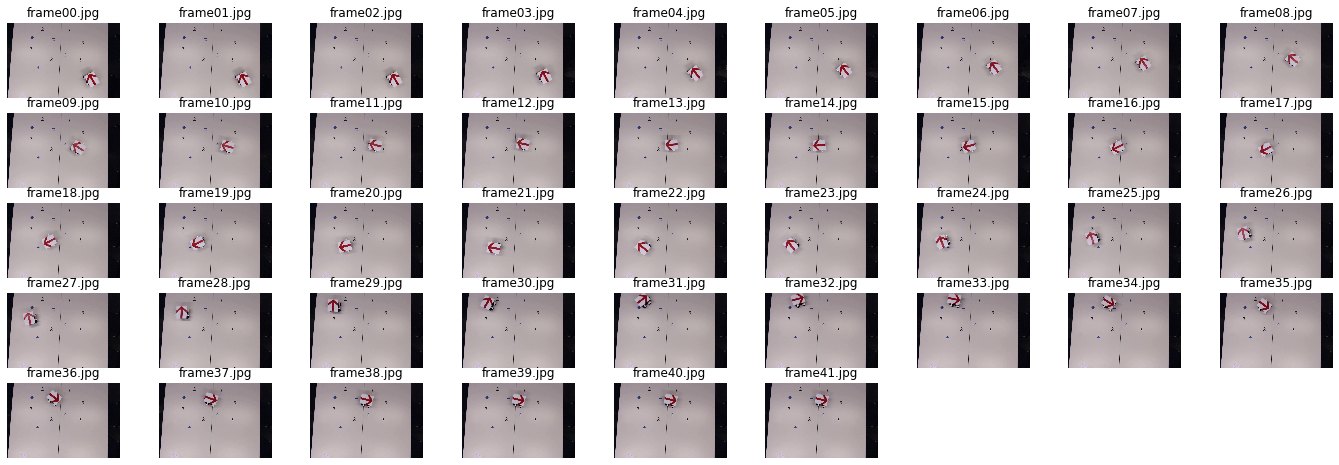

In [2]:
# extract images from video
extract_images()

# load data from extracted images
images, images_names = load_data()

# plot images
fig, axes = plt.subplots(5, int(len(images)/5)+1, figsize=(24, 8))
for ax, im, nm in zip(axes.ravel(), images, images_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)   
for ax in axes.ravel()[len(images):]:
    fig.delaxes(ax)

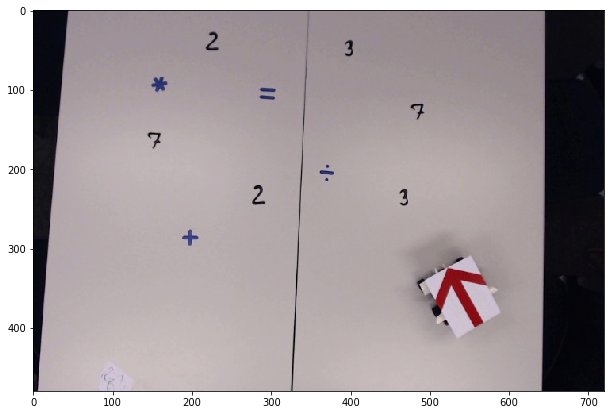

In [114]:
plt.figure(figsize=(12,7))
plt.imshow(images[0])

In [103]:
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu,median
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.color import rgb2gray
from skimage.morphology import disk,opening,star,square,rectangle

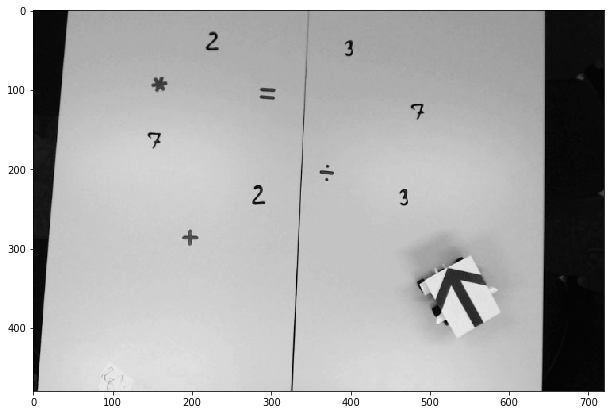

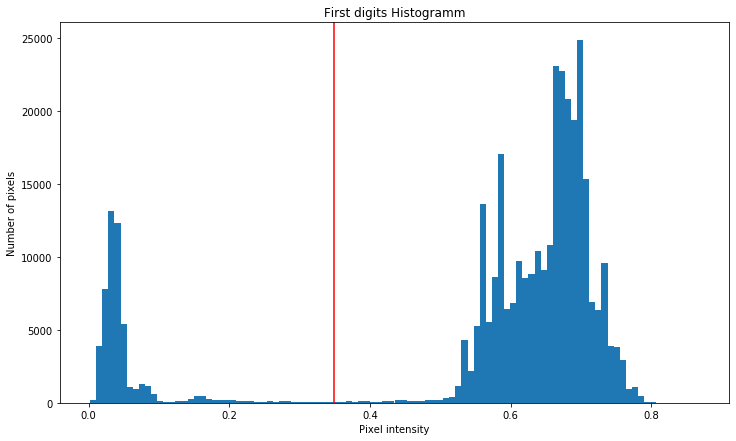

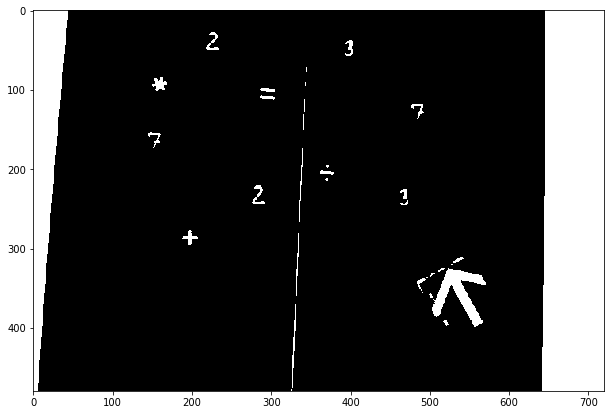

In [155]:
# convert to grayscale 
gray = rgb2gray(images[0])

plt.figure(figsize=(12,7))
plt.imshow(gray,cmap='gray')
plt.show()

# Binarization based on Otsu threshold
thresh = threshold_otsu(gray)

# Display histogram
plt.figure(figsize=(12, 7))
plt.hist(gray.ravel(), bins=100)
plt.axvline(thresh, color='r')
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('First digits Histogramm')

plt.show()

binarized = gray < thresh


plt.figure(figsize=(12,7))
plt.imshow(binarized,cmap='gray')
plt.show()


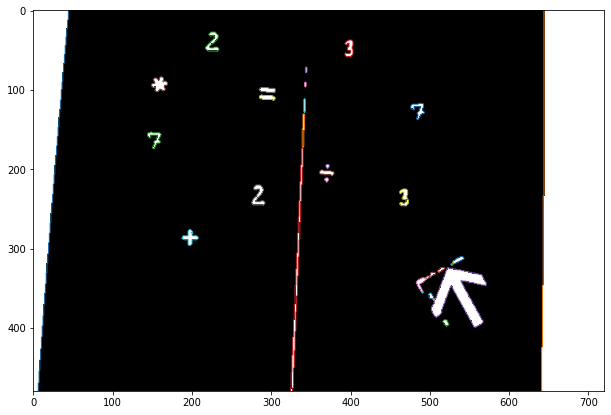

In [124]:
from skimage.measure import label, regionprops, find_contours
import numpy as np
from skimage.draw import polygon_perimeter

contour = find_contours(binarized,0)
plt.figure(figsize=(12,7))
plt.imshow(binarized, cmap='gray')
for c in contour :
    plt.plot(c[:,1],c[:,0], linewidth = 1)

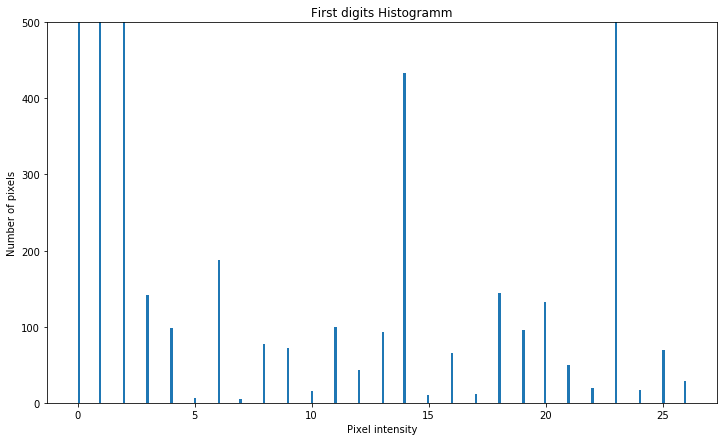

[293682  11628  36434    141     98      6    187      5     77     72
     16    100     43     93    434     10     65     11    144     96
    133     50     20   1941     17     69     28]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


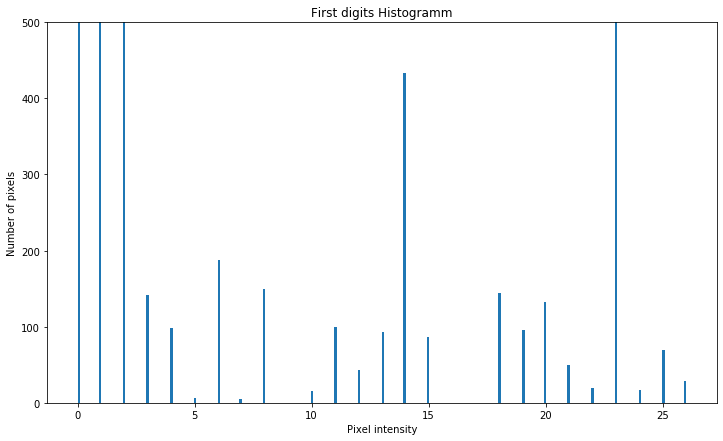

[293682  11628  36434    141     98      6    187      5    149      0
     16    100     43     93    434     86      0      0    144     96
    133     50     20   1941     17     69     28]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 18 19 20 21 22 23 24 25 26]


(28, 2)

In [189]:
# label image regions
label_image = label(binarized,background = 0, connectivity = 2)

# Display histogram
plt.figure(figsize=(12, 7))
plt.hist(label_image.ravel(), bins=256)
plt.ylim(0,500)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('First digits Histogramm')

plt.show()

label_tmp = np.copy(label_image)
freq = np.bincount(label_image.ravel())
ii = np.nonzero(freq)[0]
print(freq)
print(ii)


for i in range(26):
    if (abs(freq[i+1]-freq[i])<10) :
        idx = np.argwhere(label_image == ii[i+1])
        label_image[idx[:,0],idx[:,1]] = ii[i]
        
for i in range(25) :
    if (abs(freq[i+2]-freq[i])<5 and abs(freq[i+1]-freq[i])<75) :
        idx2 = np.argwhere(label_image == ii[i+2])
        idx1 = np.argwhere(label_image == ii[i+1])
        label_image[idx2[:,0],idx2[:,1]] = ii[i]
        label_image[idx1[:,0],idx1[:,1]] = ii[i]

# Display histogram
plt.figure(figsize=(12, 7))
plt.hist(label_image.ravel(), bins=256)
plt.ylim(0,500)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('First digits Histogramm')

plt.show()   

freq = np.bincount(label_image.ravel())
ii = np.nonzero(freq)[0]
print(freq)
print(ii)

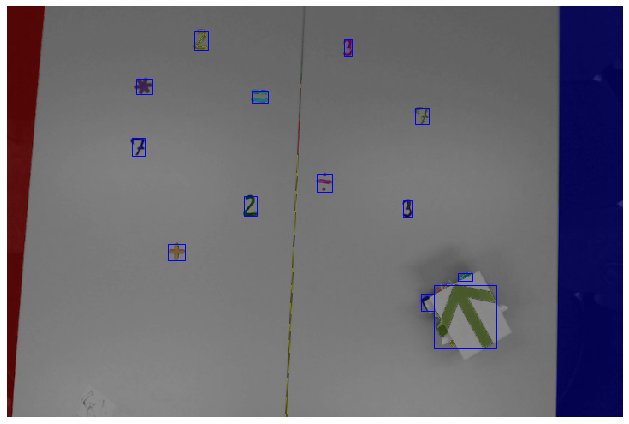

In [191]:
image_label_overlay = label2rgb(label_image, image=images[0], bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if (region.area >= 50) and (region.bbox[2]-region.bbox[0]) < 100 :
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='blue', linewidth=1)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()